# Weekly Passing Analysis

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.fantasy_football_v2.data.generate_dataframes.generate_passer_df import generate_passer_df
from src.fantasy_football_v2.data.generate_dataframes.generate_weekly_points_df import generate_weekly_points_df

from src.fantasy_football_v2.utilities.get_stats import get_summary_stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [50]:
# Get last year data since we only have last year fantasy points
passer_df = generate_passer_df([2024])
passer_df.shape

(588, 18)

In [51]:
passer_df.head()

,season,week,player_gsis_id,player_display_name,player_position,team_abbr,avg_time_to_throw,aggressiveness,max_completed_air_distance,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,avg_air_distance,max_air_distance
4714,2024,0,00-0036355,Justin Herbert,QB,LAC,2.910539,15.873016,51.558840,504,3870,23,3,101.703042,332,65.873016,21.994896,56.048868
4715,2024,0,00-0039918,Caleb Williams,QB,CHI,2.919392,12.099644,57.295033,562,3541,20,6,87.796560,351,62.455516,21.315495,58.660844
4716,2024,0,00-0036389,Jalen Hurts,QB,PHI,3.131300,16.343490,59.287984,361,2903,18,5,103.687673,248,68.698061,21.781763,59.287984
4717,2024,0,00-0034869,Sam Darnold,QB,MIN,3.083395,13.944954,54.327453,545,4319,35,12,102.534404,361,66.238532,22.138207,55.646285
4718,2024,0,00-0029604,Kirk Cousins,QB,ATL,2.708490,19.646799,49.963083,453,3508,18,16,88.617550,303,66.887417,21.189211,54.513717


In [52]:
weekly_points_df = generate_weekly_points_df([2024])
weekly_points_df.head()

Downcasting floats.


,season,week,player_id,player_display_name,recent_team,position,fantasy_points_ppr,game_id
0,2024,1,00-0023459,Aaron Rodgers,NYJ,QB,8.580000,2024_01_NYJ_SF
1,2024,2,00-0023459,Aaron Rodgers,NYJ,QB,15.140000,2024_02_NYJ_TEN
2,2024,3,00-0023459,Aaron Rodgers,NYJ,QB,21.040001,2024_03_NE_NYJ
3,2024,4,00-0023459,Aaron Rodgers,NYJ,QB,11.600000,2024_04_DEN_NYJ
4,2024,5,00-0023459,Aaron Rodgers,NYJ,QB,11.760000,2024_05_NYJ_MIN


In [53]:
# merge fantasy points into passer data
passer_df_pts = passer_df.merge(
    weekly_points_df[[
        'season',
        'week',
        'player_id',
        'fantasy_points_ppr'
    ]],
    left_on=['season', 'week', 'player_gsis_id'],
    right_on=['season', 'week', 'player_id'],
    how='left'
)

passer_df_pts.shape

(588, 20)

In [54]:
passer_df_pts.head()

,season,week,player_gsis_id,player_display_name,player_position,team_abbr,avg_time_to_throw,aggressiveness,max_completed_air_distance,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,avg_air_distance,max_air_distance,player_id,fantasy_points_ppr
0,2024,0,00-0036355,Justin Herbert,QB,LAC,2.910539,15.873016,51.558840,504,3870,23,3,101.703042,332,65.873016,21.994896,56.048868,NaN,NaN
1,2024,0,00-0039918,Caleb Williams,QB,CHI,2.919392,12.099644,57.295033,562,3541,20,6,87.796560,351,62.455516,21.315495,58.660844,NaN,NaN
2,2024,0,00-0036389,Jalen Hurts,QB,PHI,3.131300,16.343490,59.287984,361,2903,18,5,103.687673,248,68.698061,21.781763,59.287984,NaN,NaN
3,2024,0,00-0034869,Sam Darnold,QB,MIN,3.083395,13.944954,54.327453,545,4319,35,12,102.534404,361,66.238532,22.138207,55.646285,NaN,NaN
4,2024,0,00-0029604,Kirk Cousins,QB,ATL,2.708490,19.646799,49.963083,453,3508,18,16,88.617550,303,66.887417,21.189211,54.513717,NaN,NaN


In [55]:
passer_df_pts['week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [56]:
weekly_points_df['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       12])

In [57]:
df = passer_df_pts[
    (passer_df_pts['season'] == 2024) &
    (passer_df_pts['week'] == 1) &
    (passer_df_pts['player_display_name'] == 'Justin Herbert')
]

df.head()

,season,week,player_gsis_id,player_display_name,player_position,team_abbr,avg_time_to_throw,aggressiveness,max_completed_air_distance,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,avg_air_distance,max_air_distance,player_id,fantasy_points_ppr
55,2024,1,00-0036355,Justin Herbert,QB,LAC,2.733231,7.692308,35.247947,26,144,1,0,92.467949,17,65.384615,19.588994,44.140318,00-0036355,10.36


### Average time to throw

In [58]:
summary = pd.DataFrame({
    'stat': ['min', 'mean', 'median', 'max'],
    'avg_time_to_throw': [
        passer_df_pts['avg_time_to_throw'].min(),
        passer_df_pts['avg_time_to_throw'].mean(),
        passer_df_pts['avg_time_to_throw'].median(),
        passer_df_pts['avg_time_to_throw'].max()
    ]
})

summary

,stat,avg_time_to_throw
0,min,2.171622
1,mean,2.814235
2,median,2.799539
3,max,3.778545


In [59]:
get_summary_stats(
    df=passer_df_pts,
    metric='avg_time_to_throw',
    identifiers=['player_display_name', 'week']
)

Statistic,player_display_name,week,avg_time_to_throw
Min,Andy Dalton,3,2.170000
Mean,-,-,2.810000
Median,-,-,2.800000
Max,Bo Nix,6,3.780000


In [60]:
grouped = (
    passer_df_pts.groupby('player_display_name', as_index=False)['avg_time_to_throw']
    .mean()
    .sort_values(
    'avg_time_to_throw',
    ascending=True
    )
).reset_index()

print(grouped)

    index       player_display_name  avg_time_to_throw
0      45              Malik Willis           2.250316
1      61            Tua Tagovailoa           2.419383
2      12              Carson Wentz           2.422235
3      57                 Tim Boyle           2.480375
4      60                Trey Lance           2.488000
5      13               Cooper Rush           2.544212
6      26               Jake Haener           2.553235
7       2               Andy Dalton           2.576399
8      50         Mitchell Trubisky           2.582952
9      16               Davis Mills           2.595000
10     19            Desmond Ridder           2.614011
11     62             Tyler Huntley           2.619197
12     56              Tanner McKee           2.634268
13     37              Joshua Dobbs           2.657833
14     31           Jimmy Garoppolo           2.659268
15     49         Michael Penix Jr.           2.667673
16     63                Will Levis           2.669189
17     58 

In [61]:
passer_df_pts.columns

Index(['season', 'week', 'player_gsis_id', 'player_display_name',
       'player_position', 'team_abbr', 'avg_time_to_throw', 'aggressiveness',
       'max_completed_air_distance', 'attempts', 'pass_yards',
       'pass_touchdowns', 'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'avg_air_distance', 'max_air_distance',
       'player_id', 'fantasy_points_ppr'],
      dtype='object')

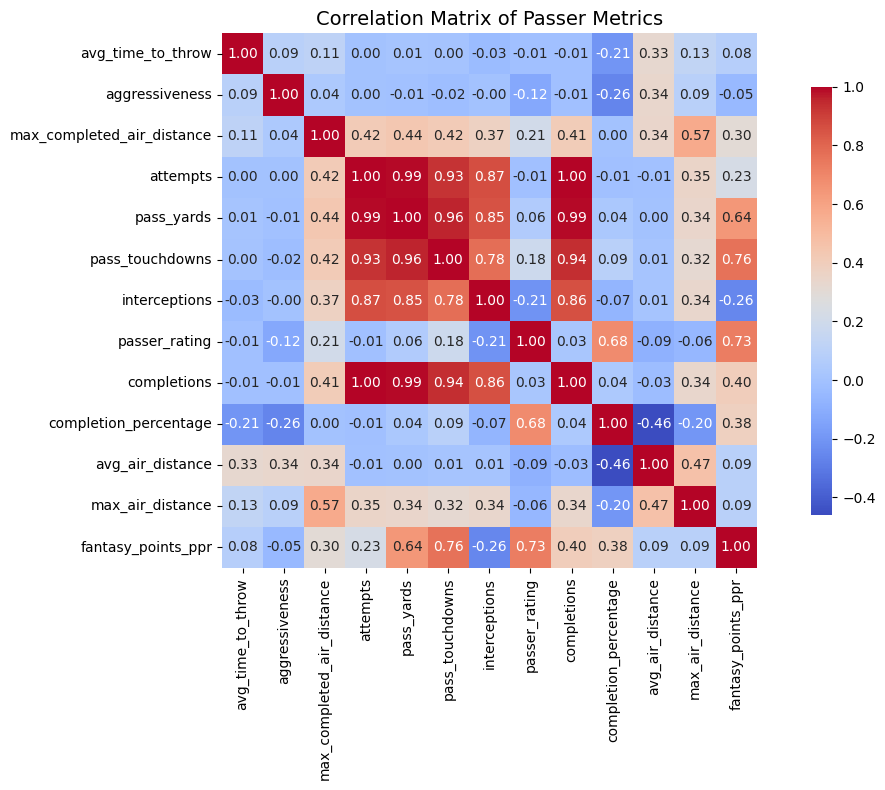

In [62]:
# Correlation Matrix
# select numerical column only
metrics_df = passer_df_pts.select_dtypes(include=[np.number])
metrics_df.drop(['season', 'week'], axis=1, inplace=True)

# Create the correlation matrix
corr_matrix = metrics_df.corr()

# Plot correlation matrix as a heat map
plt.figure(
    figsize = (12, 8)
)
sns.heatmap(
    corr_matrix,
    annot=True, # Shows correlation values in cells
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={'shrink': 0.8} # Makes colorbar smaller
)
plt.title("Correlation Matrix of Passer Metrics", fontsize=14)
plt.tight_layout()
plt.show()

Passing Touchdowns are most closely related to fantasy points, followed by passer_rating

### Group Players by Passer Rating and Passing Touchdowns

1.  High Passer Rating, High Passing Touchdowns

2.  High Passer Rating, Low Passing Touchdowns

3.  Low Passer Rating, High Passing Touchdowns

4.  Low Passer Rating, Low Passing Touchdowns

In [76]:
# Group by player and take average passer_rating and pass_touchdowns
df = (
    passer_df_pts.groupby('player_display_name', as_index=False)
        .agg({
            'passer_rating': 'mean',
            'pass_touchdowns': 'mean',
    })
)

# Calculate the overall averages
avg_rating = passer_df_pts['passer_rating'].mean()
avg_passing_tds = passer_df_pts['pass_touchdowns'].mean()

# Define the conditions
conditions = [
    (df['passer_rating'] > avg_rating) & (df['pass_touchdowns'] > avg_passing_tds),
    (df['passer_rating'] > avg_rating) & (df['pass_touchdowns'] <= avg_passing_tds),
    (df['passer_rating'] <= avg_rating) & (df['pass_touchdowns'] > avg_passing_tds),
    (df['passer_rating'] <= avg_rating) & (df['pass_touchdowns'] <= avg_passing_tds)
]

# 3️⃣ Define the corresponding group labels
groups = [
    "High Rating / High TDs",
    "High Rating / Low TDs",
    "Low Rating / High TDs",
    "Low Rating / Low TDs"
]

# Create a new column for group
df['performance_group'] = np.select(conditions, groups)

# View players by group
df = (df.groupby('performance_group', group_keys=False)
    .apply(lambda x: x[['performance_group', 'player_display_name', 'passer_rating', 'pass_touchdowns']])
    .reset_index(drop=True)
)

df = df.sort_values(
    by=['performance_group', 'passer_rating', 'pass_touchdowns'],
    ascending=[True, False, False]
)

# Remove player with a low rating and low td's
df = df[
    df['performance_group'] != 'Low Rating / Low TDs'
]

print(df.shape)
df.head(100)

(31, 4)


,performance_group,player_display_name,passer_rating,pass_touchdowns
43,High Rating / High TDs,Lamar Jackson,120.088417,4.555556
29,High Rating / High TDs,Jared Goff,113.942930,4.111111
32,High Rating / High TDs,Joe Burrow,107.566744,4.777778
5,High Rating / High TDs,Baker Mayfield,105.941115,4.555556
36,High Rating / High TDs,Josh Allen,103.397038,3.294118
53,High Rating / High TDs,Sam Darnold,103.114808,3.888889
17,High Rating / High TDs,Derek Carr,102.493709,2.727273
30,High Rating / High TDs,Jayden Daniels,100.772160,3.125000
61,High Rating / High TDs,Tua Tagovailoa,99.860100,3.166667
35,High Rating / High TDs,Jordan Love,98.808219,3.333333
